In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import leastsq  # 普通最小二乘法，一元线性回归模型
data = pd.read_csv("advertising.csv", index_col=0,)
print(data.head())

      tv  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [4]:
# Exercise 9.1
# 使用 SciPy 提供的普通最小二乘法分别计算 3 个特征与目标之间的一元线性回归模型拟合参数
p_init = np.random.randn(2)

def func(p, x):
    w0, w1 = p
    f = w0 + w1 * x
    return f

def err_func(p, x, y):
    ret  = func(p, x) - y
    return ret

params_tv = leastsq(err_func, p_init, args=(data.tv, data.sales))
params_radio = leastsq(err_func, p_init, args=(data.radio, data.sales))
params_newspaper = leastsq(err_func, p_init, args=(data.newspaper, data.sales))

print(params_tv[0])
print(params_radio[0])
print(params_newspaper[0])

[7.03259356 0.04753664]
[9.31163805 0.20249578]
[12.35140708  0.0546931 ]


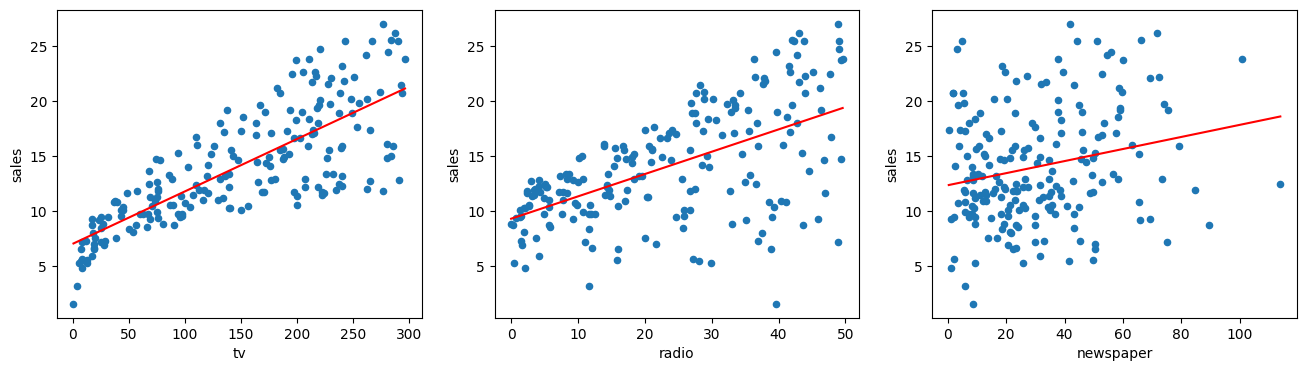

In [6]:
# Exercise 9.2
# 以横向子图的方式绘制 3 个特征分别与目标之间的散点图，并添加线性拟合直线
from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(16,4))

data.plot(kind='scatter', x='tv', y='sales', ax=axes[0])
data.plot(kind='scatter', x='radio', y='sales', ax=axes[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axes[2])

x_tv = np.array([data.tv.min(), data.tv.max()])
axes[0].plot(x_tv, params_tv[0][1] * x_tv + params_tv[0][0], 'r')

x_radio = np.array([data.radio.min(), data.radio.max()])
axes[1].plot(x_radio, params_radio[0][1] * x_radio + params_radio[0][0], 'r')

x_newspaper = np.array([data.newspaper.min(), data.newspaper.max()])
axes[2].plot(x_newspaper, params_newspaper[0][1] * x_newspaper + params_newspaper[0][0], 'r')

In [10]:
# Exercise 9.3
# 使用 scikit-learn 提供的线性回归方法建立由 3 个特征与目标组成的多元线性回归模型

from sklearn.linear_model import LinearRegression

X = data[['tv', 'radio', 'newspaper']]
y = data.sales

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([ 0.04576465,  0.18853002, -0.00103749]), np.float64(2.938889369459412))

In [13]:
# Exercise 9.4
# 使用 statsmodels 库提供的相关方法来完成上面多元回归模型的拟合优度检验和变量显著性检验

import statsmodels.formula.api as smf

res = smf.ols(formula='sales~tv + radio + newspaper', data=data).fit()

res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                780.3622
Date:               2025-11-24 14:32 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
tv              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""